# Capítulo 8 - Introdução à Família Actor-Critic


Você pode rodar este notebook no Colab ou localmente. Para abrir diretamente no Colab, basta clicar no link abaixo.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/pablo-sampaio/rl_facil/blob/main/cap08/cap08-main-2.ipynb) 


## Configurações Iniciais

In [1]:
import sys
from IPython.display import clear_output

IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install gym==0.23.1  # also works with 0.25.2
    !pip install gym[box2d]

    # para salvar videos
    !apt-get install -y ffmpeg xvfb x11-utils

    !git clone https://github.com/pablo-sampaio/rl_facil
    sys.path.append("/content/rl_facil")

    clear_output()
else:
    from os import path
    sys.path.append( path.dirname( path.dirname( path.abspath("__main__") ) ) )

clear_output()

In [2]:
if IN_COLAB:
    import os
    os.system("Xvfb :1 -screen 0 1400x900x24 &")
    os.environ['DISPLAY'] = ':1'

In [3]:
import gym
import numpy as np

from util.experiments import repeated_exec
from util.plot import plot_result, plot_multiple_results
from util.notebook import display_videos_from_path

from cap08.models_torch_pg import PolicyModelPG, PolicyModelPGWithExploration, ValueModel 
from cap08.models_torch_pg import test_policy
from cap08.actor_critic import run_basic_actor_critic
from cap08.actor_critic_nstep import run_actor_critic_nstep

## 1 - Rodando o Actor-Critic Básico (de 1 passo)

In [12]:
ENV_NAME, rmax = "CartPole-v1", 500
#ENV_NAME, rmax = "Acrobot-v1", 0
#ENV_NAME, rmax = "LunarLander-v2", 150
#ENV_NAME, rmax = "MountainCar-v0", -20

NUM_STEPS = 10000
GAMMA    = 0.99

env = gym.make(ENV_NAME)
inputs = env.observation_space.shape[0]
outputs = env.action_space.n
policy1 = PolicyModelPG(inputs, [256,256], outputs, lr=1e-5)
v_model = ValueModel(inputs, [256,32], lr=2e-4)

returns1, policy = run_basic_actor_critic(env, NUM_STEPS, GAMMA, initial_policy=policy1, initial_v_model=v_model)
clear_output()

print("Últimos episódios do treinamento: media =", np.mean(returns1[-20:]), ", desvio padrao =", np.std(returns1[-20:]))

Últimos episódios do treinamento: media = 4962.475 , desvio padrao = 4953.719925407067


Attention: 'window' is ignored for 'step' type of returns


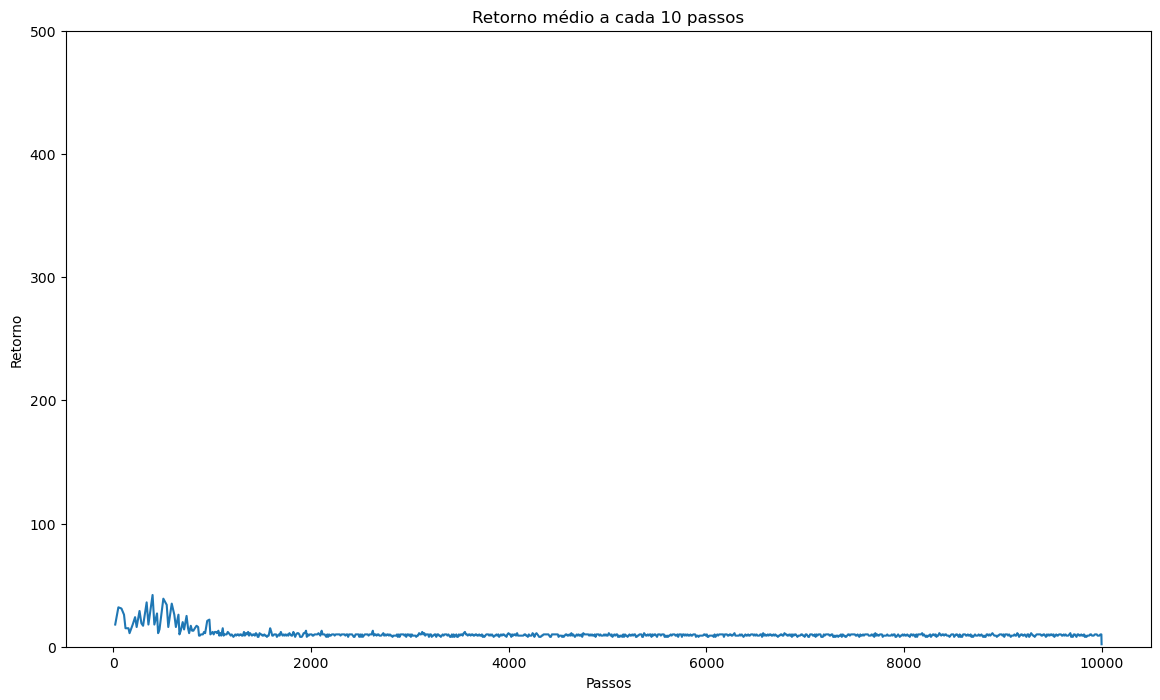

In [13]:
# Exibe um gráfico episódios x retornos (não descontados)
plot_result(returns1, rmax, return_type='steps')

In [6]:
# Roda alguns episódigos com o modelo e salva os vídeos em arquivos
env1 = gym.make(ENV_NAME)
video_env=gym.wrappers.RecordVideo(env1, "./vid-ac-basic", episode_trigger=(lambda ep : True))
test_policy(video_env, policy1, 0.0, 3, render=False)
video_env.close()

d:\Pablo\anaconda3\envs\rlx\lib\site-packages\gym\wrappers\monitoring\video_recorder.py:115: DeprecationWarning: WARN: `env.metadata["video.frames_per_second"] is marked as deprecated and will be replaced with `env.metadata["render_fps"]` see https://github.com/openai/gym/pull/2654 for more details
  logger.deprecation(
d:\Pablo\anaconda3\envs\rlx\lib\site-packages\gym\wrappers\monitoring\video_recorder.py:421: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if distutils.version.LooseVersion(


EPISODE 1
- steps: 17
- return: 17.0
EPISODE 2
- steps: 22
- return: 22.0
EPISODE 3
- steps: 14
- return: 14.0
RESULTADO FINAL: média (por episódio): 17.7, episódios: 3, total de passos: 53


In [7]:
display_videos_from_path('./vid-ac-basic')

## 2 - Rodando o Actor-Critic de n Passos

In [4]:
ENV_NAME, rmax = "CartPole-v1", 500
#ENV_NAME, rmax = "Acrobot-v1", 0
#ENV_NAME, rmax = "LunarLander-v2", 150
#ENV_NAME, rmax = "MountainCar-v0", -20

# ATENÇÃO para a mudança: agora, o critério de parada é pela quantidade de passos
# e não pela quantidade de episódios (agora estamos seguindo o padrão da área)
NUM_STEPS = 20000
GAMMA     = 0.99
NSTEP     = 32
EXPLORATION_FACTOR = 0.05  # no CartPole, funciona bem com 0.0

env = gym.make(ENV_NAME)
inputs = env.observation_space.shape[0]
outputs = env.action_space.n

#policy2 = PolicyModelPGWithExploration(inputs, [256, 256], outputs, exploration_factor=EXPLORATION_FACTOR, lr=3e-5)
policy2 = PolicyModelPG(inputs, [256, 256], outputs, lr=4e-5) #5e-5
v_model = ValueModel(inputs, [256,32], lr=8e-5) #1e-4

returns2, policy2 = run_actor_critic_nstep(env, NUM_STEPS, GAMMA, nstep=NSTEP, initial_policy=policy2, initial_v_model=v_model)
clear_output()

print("Últimos episódios do treinamento: media =", np.mean(returns2[-20:]), ", desvio padrao =", np.std(returns2[-20:]))

Últimos episódios do treinamento: media = 9504.325 , desvio padrao = 9392.23022606319


Attention: 'window' is ignored for 'step' type of returns


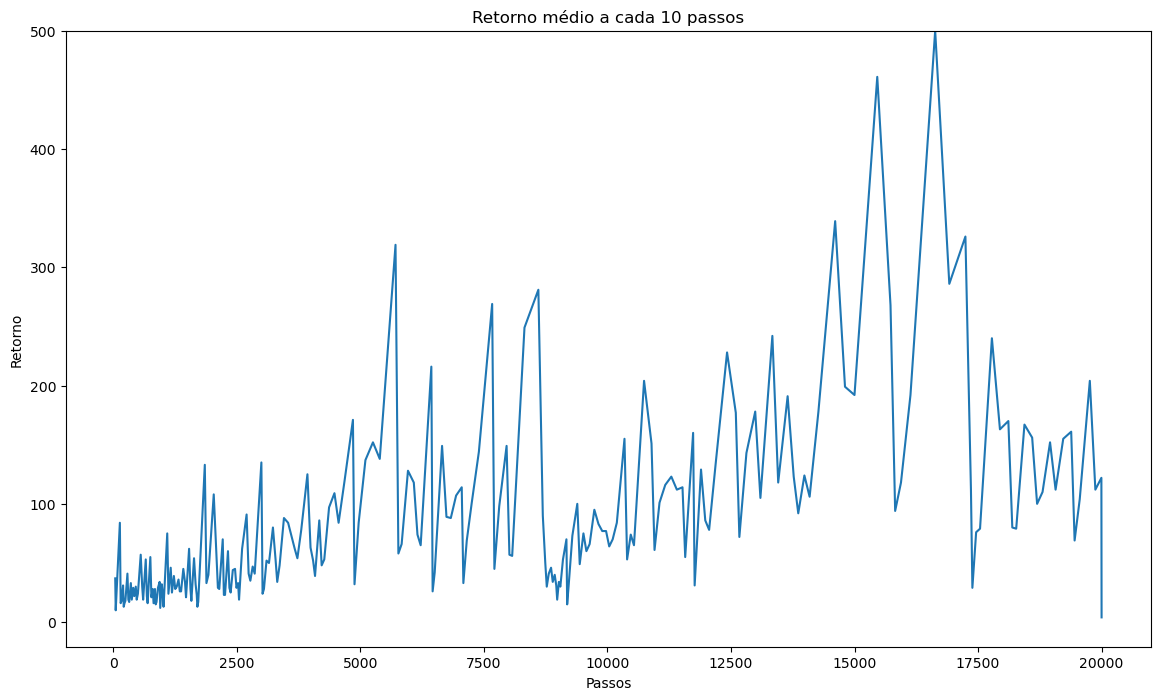

In [5]:
# Exibe um gráfico episódios x retornos (não descontados)
plot_result(returns2, rmax, return_type='steps')

In [6]:
# Roda alguns episódigos com o modelo e salva os vídeos em arquivos
env2 = gym.make(ENV_NAME)
video_env=gym.wrappers.RecordVideo(env2, "./vid-ac-nsteps", episode_trigger=(lambda ep : True))
test_policy(video_env, policy2, False, 3, render=False)
video_env.close()

d:\Pablo\anaconda3\envs\rlx\lib\site-packages\gym\wrappers\monitoring\video_recorder.py:115: DeprecationWarning: WARN: `env.metadata["video.frames_per_second"] is marked as deprecated and will be replaced with `env.metadata["render_fps"]` see https://github.com/openai/gym/pull/2654 for more details
  logger.deprecation(
d:\Pablo\anaconda3\envs\rlx\lib\site-packages\gym\wrappers\monitoring\video_recorder.py:421: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if distutils.version.LooseVersion(


EPISODE 1
- steps: 153
- return: 153.0
EPISODE 2
- steps: 31
- return: 31.0
EPISODE 3
- steps: 174
- return: 174.0
RESULTADO FINAL: média (por episódio): 119.3, episódios: 3, total de passos: 358


In [7]:
display_videos_from_path('./vid-ac-nsteps')

## 3 - Experimentos


### FAZER
- Criar método clone no V_model
- Chamá-lo no REINFORCE with Adv e nos métodos A/C
- Fazer os experimentos do script de experimentos
- Desenvolver esta seção apropriadamente
- Comparar aqui com o REINF with Adv

### 3.1 Comparações Básicas


In [ ]:
AUTO_LOAD = False

In [ ]:
env = gym.make("CartPole-v1")
NUM_STEPS = 20000

results3 = []

results3.append( repeated_exec(3, f"Actor-Critic 1-step", run_basic_actor_critic, env, NUM_STEPS, gamma=0.99, auto_load=AUTO_LOAD) )
clear_output()

results3.append( repeated_exec(3, f"Actor-Critic 32-steps", run_actor_critic_nstep, env, NUM_STEPS, gamma=0.99, auto_load=AUTO_LOAD) )
clear_output()

In [ ]:
#plot_multiple_results(results3, cumulative=False, x_log_scale=False)

In [ ]:
plot_multiple_results(results3, cumulative=False, plot_stddev=True)